## WORKING WITH WORD,PDF AND JSON DOCUMENTS

Pdf and word documents are binary files because they contain more than just plain text. In addition to text, they contain fonts, colors and other layout information. Json files on the other hand are plain text files. The python modules we are going to use for working with pdf, word and json documents are PyPDF2, Python-Docx and json respectively.

## PDF DOCUMENTS
PDF is an acronym for Portable Document Format. The PyPDF2 module can only allow us extract text from PDF documents. Before you can use the PyPDF2 module, you need to install the module by typing the command `pip install --user PyPDF2` in your command prompt. To read a PDF file, we use the PdfFileReader() method of the PyPDF2 module. This method takes a file object as a parameter.

In [ ]:
import PyPDF2
file_obj = open (r'C:\Users\General\Downloads\A Sample PDF.pdf', 'rb')
reader_obj = PyPDF2.PdfFileReader(file_obj)
num_of_pages = reader_obj.numPages
num_of_pages

In [ ]:
page = reader_obj.getPage(0)
print(page.extractText())


In [ ]:
for index in range(num_of_pages):
    page = reader_obj.getPage(index)
    text = page.extractText()
    print(text)
   # print(reader_obj.getPage(index).extractText())

The file reader object has a method `getDocumentInfo()` that return a dictionary of information such as author, date of creation etc of a pdf document.

In [ ]:
info = reader_obj.getDocumentInfo()
info

In [ ]:
author = info.author
author

In [ ]:
file_obj.close()

## DECRYPTING PDFS
Some PDF documents are encrypted with a passsword. Before you can read such documents, you need to decrypt it by entering the correct password. The PyPDF2 module has a decrypt() method to decrypt encrypted PDF documents. This method receives the password as an argument. 
All PDFFileObjects have an attribute called `isEncrypted` that returns True if a PDF document is encrypted.

In [ ]:
encrypted_pdf = PyPDF2.PdfFileReader(open(r'Encrypted_doc.pdf', 'rb'))
print(encrypted_pdf.isEncrypted)

In [ ]:
password = input('Enter password')

In [ ]:
#encrypted_pdf.decrypt(password)
encrypted_pdf.decrypt('Rainigeria.')
print(encrypted_pdf.getPage(0).extractText())

## CREATING PDF DOCUMENTS
To create a new PDF document, we use the PdfFileWriter() method. This method does not allows writing of text to a PDF document or directly editing a PDF file but can copy pages from other PDF documents, rotate pages in a PDF and encrypt PDF documents.


In [ ]:
#creating a pdf writer object
writer_obj = PyPDF2.PdfFileWriter()

## COPYING PDF DOCUMENTS

In [ ]:
#copying pages from an eisting pdf document
reader_obj = PyPDF2.PdfFileReader(open (r'C:\Users\General\Downloads\A Sample PDF.pdf', 'rb'))
for page_num in range(reader_obj.numPages):
    page = reader_obj.getPage(page_num)
    writer_obj.addPage(page)


In [ ]:
#Writing the copied pages to an output pdf document
writer_obj.write(open('Book1_copy.pdf', 'wb'))

## ROTATING PAGES
The methods rotateClockwise() and rotateCounterClockwise() methods used to rotate any pdf page in 90 degrees increments (90, 180. 270).

In [ ]:
page = reader_obj.getPage(0)

In [ ]:
page.rotateClockwise(90)
writer_obj.addPage(page)
writer_obj.write(open('rotated_pdf.pdf', 'wb'))

## ENCRYPTING PDF DOCUMENTS
The PdfFileWriter() object can also encrypt PDF documents using its encrypt method which takes the password as parameter. The encrypt method can take two parameters; the user password and the owner password. If only one password is supplied, it is used as both user and owner password.

In [ ]:
writer_obj = PyPDF2.PdfFileWriter()
reader_obj = PyPDF2.PdfFileReader(open(r'C:\Users\General\Downloads\A Sample PDF.pdf', 'rb'))

In [ ]:
for index in range(reader_obj.numPages):
    writer_obj.addPage(reader_obj.getPage(index))

In [ ]:
writer_obj.encrypt('Admissions')
writer_obj.write(open('Admissions.pdf', 'wb'))

## WORD DOCUMENTS

The python-docx module allows us to read from and write to word documents. To install this module, simply type `pip install --user -U python-docx` in your terminal or command prompt.

In [ ]:
import docx

## READING TEXT FROM A WORD DOCUMENT
Text in word documents are different from plain text as they contain color, font and other style information. Also, unlike plain text documents, the structure of a word document is different. There are three levels;  
1. Document: refers to the entire document and contains a list of paragraphs
2. Paragraph: contains a list of Run objects.
3. Run: a contigous run of text with same style.

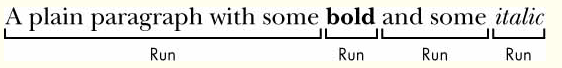


To read from a word document, we use the Document method of the python-docx module which receives the document path as an argument. We cn also retrive the paragraphs contained in te document and the runs contained in a paragraph using the paragraphs and runs attributes respectively.

In [ ]:
doc = docx.Document(r'MACHINE LEARNING.docx')

In [ ]:
paragraphs = doc.paragraphs
paragraphs

You can access the text of a paragraph using the text attribute.

In [ ]:
paragraphs[0].text

In [ ]:
runs = paragraphs[8].runs
len(runs)

In [ ]:
runs[0].text

In [ ]:
runs[1].text

## ADDING STYLES TO A WORD DOCUMENT
Word documents have various styles. To view the styles on Windows, click `Ctrl-Alt-Shift-S` keys. On MacOS, click on view and select styles. 


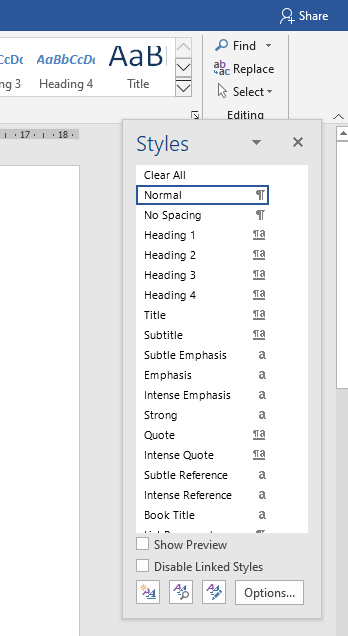

There are three styles types for word documents; paragraph styles, character styles and linked styles. Paragraph styles are used on paragraph objects, character styles are used on run objects and linked styles are used for both. In the styles pane, Paragraph styles are prefixed with Paragraph symbol `P`, character styles are prefixed with the character symbol `a` and linked styles are prefixed with both.  We use the style attribute to add styles to paragraph and run objects.

In [ ]:
paragraph = paragraphs[5]
paragraph.style = 'Heading 4'
doc.save('ML.docx')

NOTE: The default styles on word document are not automatically saved to the document. You cannot access any default style in Python until you have used that particular style in the word document. Otherwise, you get a key error.

To use a linked style for a run object, you must add `Char` at the end of the style name.

In [ ]:
paragraph = paragraphs[6]
run = runs[1]
paragraph.style = 'Quote'
run.style = 'Quote Char'
doc.save('ML.docx')

## WRITING WORD DOCUMENT
To create a new word document, we use the docx.Document(). This will return a new blank word document.

In [ ]:
import docx
doc = docx.Document()

The add_paragraph() method is used to add a paragraph of text to the word document. To save the document, we need to use the save() method as pass the filename as an argumnet. 

In [ ]:
doc.add_paragraph('This is a new word document')
doc.save('new_doc.docx')

To add more text to an existing paragraph, we use the add_run() method.


In [ ]:
paragraph_1 = doc.add_paragraph('This is paragraph two.')
paragraph_2 = doc.add_paragraph('This is paragraph three.')
paragraph_1.add_run(' Paragraph consists of run objects.')
doc.save('new_doc_copy.docx')

The add_paragraph() and add_run() methods take an optional parameter which is the style parameter.

In [ ]:
doc.add_paragraph('This is a new sub topic','Heading 4')
doc.save('new_doc_copy.docx')

##  ADDING HEADERS
To add a header to a word document, we use the add_heading() method. This method takes to parameters; the header text and the heading level (an integer with values between 0 and 4).

In [ ]:
doc.add_heading('A new Header', 2)
doc.save('new_doc_copy.docx')

## ADDING PICTURES
To add a picture to a word document, use the add_picture() method. This method takes the file name, height and width for the picture (optional)

In [ ]:
file_path = r'anitaBorg.jpg'
doc.add_picture(file_path, height = docx.shared.Cm(4), width = docx.shared.Cm(4))
doc.save('new_doc_copy.docx')

## EXERCISE
Get all images (png and jpg files) in your downloads folder. Write each image and its name to a word document. The name of the image should be of the Strong style and the images should be square images (i.e same dimension for width and height).

## JSON AND API
JSON stands for JavaScript Object Notation. It is a popular way to format data as a single human readable string. Many websites provide their content as json data for programs to interact with. This is known as API (Application Programming Interface). Accessing an API is similar to accesing a web page via a URL. To make an API call, you need to check the API documentation to know the URLs your program needs to request in order to get the data you want, as well as the general format of the JSON data structures that are returned.
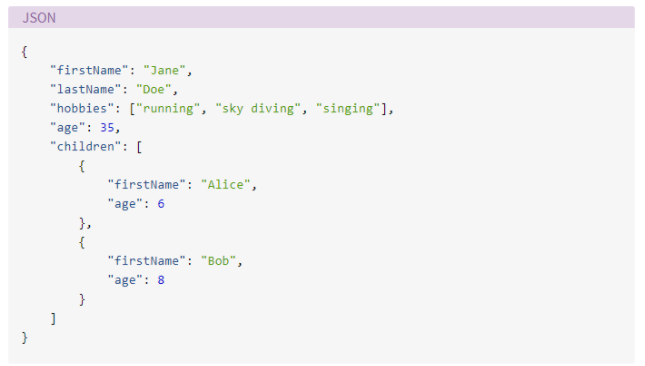

The above picture is an example of a json data. Json data supports primitive types; strings, numbers, nested data structures.

## THE JSON MODULE
The json module allows us to translate json data to python objects and vice versa. You can convert any python object to json. Below is the conversion chart for encoding/serialising python objects.

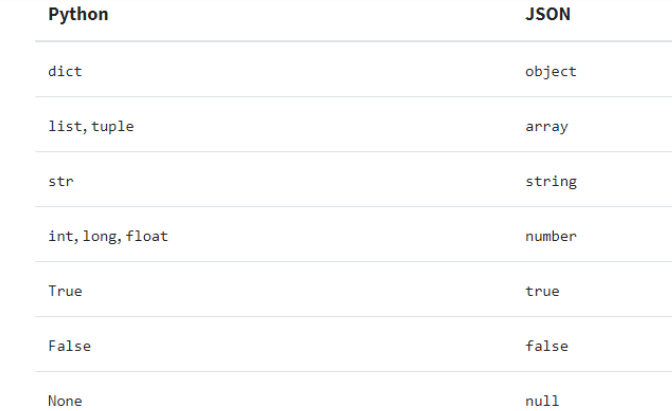

Below is the conversion chart for decoding/deserialising json data.

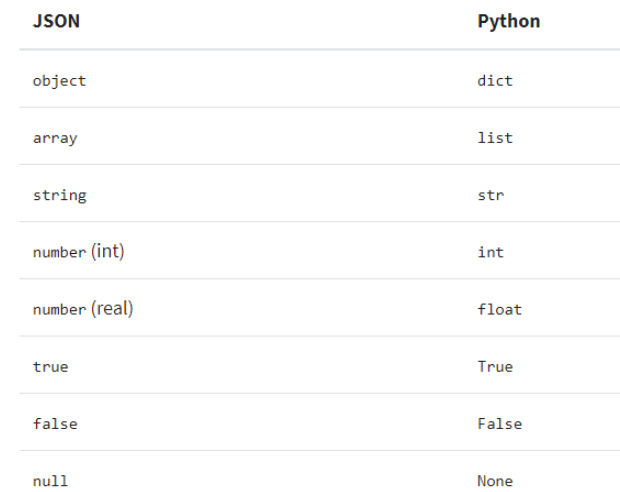

The json module has various methods to parse json data. The loads() and dumps() methods allow us to parse a string of json data. The loads() function which stands for load string allows us to translate/decode/deserialize a string of json data to a python object.

In [ ]:
import json
json_str = '{"name": "Amanda", "age": 20, "can_drive": true, "IQ": null}'
data = json.loads(json_str)
data
#type(json_str)

The dumps() function which stands for dump string is used to translate/encode/serialise python objects to a string of json data.

In [ ]:
data = {'name': 'Amanda', 'age': 20, 'can_drive': True, 'IQ': None}
json_str = json.dumps(data)
json_str

The load() and dump() methods allow us to parse a file containing json data. Below is an example of how we can use the load() method to deserialise a json data from a URL.

In [ ]:
with open('example_2.json', 'r') as f:
    data = json.load(f)
print(data)

In [ ]:
data['quiz']['sport']['q1']['options']

Below is an example of how to serialise a python object to json using the dump method. The dump method takes two required parameters, the python object to be serialised and the file object to which the json data would be written.

In [ ]:
data = {
  "colors": [
    {
      "color": "black",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [255,255,255,1],
        "hex": "#000"
      }
    },
    {
      "color": "white",
      "category": "value",
      "code": {
        "rgba": [0,0,0,1],
        "hex": "#FFF"
      }
    },
    {
      "color": "red",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [255,0,0,1],
        "hex": "#FF0"
      }
    },
    {
      "color": "blue",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [0,0,255,1],
        "hex": "#00F"
      }
    }
  ]
}

In [ ]:
with open('colors.json', 'w') as f:
    json.dump(data, f, indent = 6)
    

## EXERCISE
Load the todo json data from the url https://jsonplaceholder.typicode.com/todos and write to a new csv file all todos that have been completed.